In [27]:
#import packages
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [28]:
#load the data MNIST
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [29]:
#scale the data
def scale_mnist_data(train_images, test_images):
    """
    Takes in the training and test images and scales them to have minimum and maximum values equal to 0 and 1 respectively.
    Returns a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
    return (train_images, test_images)

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [30]:
#add dummy channel dimension
scaled_train_images = scaled_train_images[...,np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [31]:
#get the model
def get_model(input_shape):
    """
    build a Sequential model according to the following specifications and return the model
    
    -The model should use the input_shape in the function argument to set the input size in the first layer.
    -A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the input_shape keyword argument in this first layer.
    -A max pooling layer, with a 2x2 window, and default strides.
    -A flatten layer, which unrolls the input into a one-dimensional tensor.
    -Two dense hidden layers, each with 64 units and ReLU activation functions.
    -A dense output layer with 10 units and the softmax activation function.
    """
    model = Sequential([
        Conv2D(filters = 8, kernel_size = 3, padding = "SAME", activation = "relu", input_shape = input_shape),
        MaxPooling2D(pool_size = 2),
        Flatten(),
        Dense(64, activation = "relu"),
        Dense(64, activation = "relu"),
        Dense(10, activation = "softmax")
    ])
    
    return model

model = get_model(scaled_train_images[0].shape)

In [32]:
#compile the model
def compile_model(model):
    """
    Takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Doesn't  to return anything; the model will be compiled in-place.
    """
    opt = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    acc = tf.keras.metrics.SparseCategoricalAccuracy()
    
    model.compile(optimizer = opt, loss = loss, metrics = [acc])
    
compile_model(model)

In [33]:
#train the model
def train_model(model, scaled_train_images, train_labels):
    """
    Train the model for 5 epochs on the scaled_train_images and train_labels. 
    Return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs = 5)
    
    return history

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2266 - sparse_categorical_accuracy: 0.9322
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0829 - sparse_categorical_accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9891


In [34]:
#load the model history into a pandas DataFrame
frame = pd.DataFrame(history.history)
frame.head()

,loss,sparse_categorical_accuracy
0,0.226581,0.932200
1,0.082886,0.974250
2,0.056482,0.982750
3,0.042652,0.986350
4,0.033784,0.989133


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

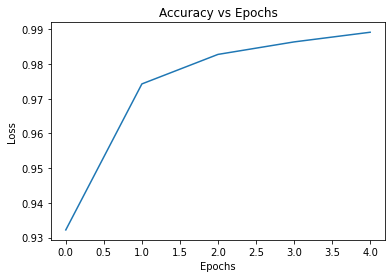

In [38]:
#make the Accuracy vs Epochs plot
acc_plot = frame.plot(y = "sparse_categorical_accuracy", title = "Accuracy vs Epochs", legend = False)
acc_plot.set(xlabel = "Epochs", ylabel = "Loss")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

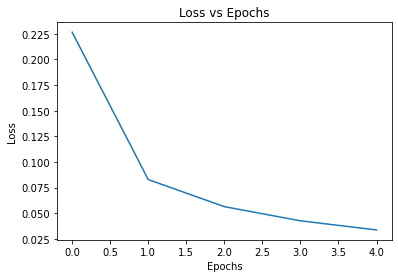

In [39]:
#make the Loss vs Epochs plot
acc_plot = frame.plot(y = "loss", title = "Loss vs Epochs", legend = False)
acc_plot.set(xlabel = "Epochs", ylabel = "Loss")

In [41]:
#evaluate the model
def evaluate_model(model, scaled_test_images, test_labels):
    """
    Evaluate the model on the scaled_test_images and test_labels.
    Return a tuple (test_loss, test_accuracy).
    """
    return model.evaluate(scaled_test_images, test_labels)

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9823
Test loss: 0.055010322481393814
Test accuracy: 0.9822999835014343


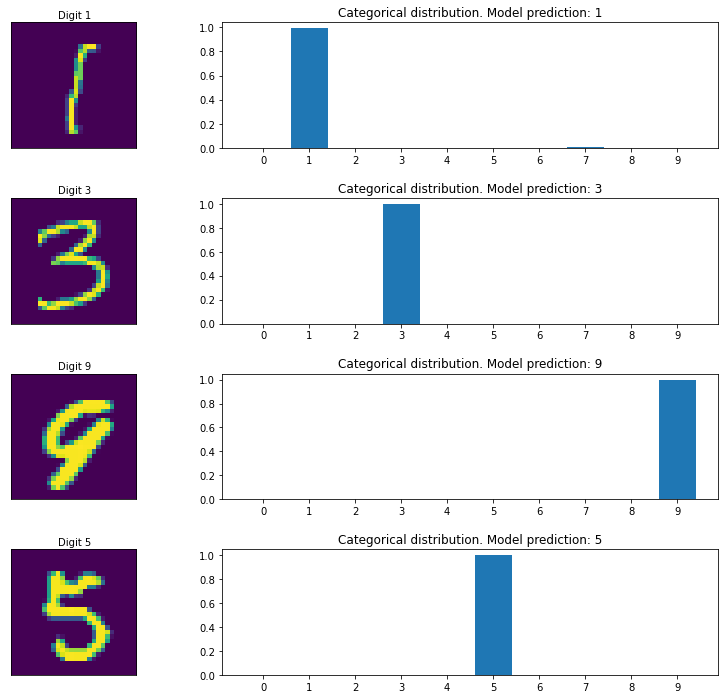

In [42]:
#get model predictions on randomly selected test images
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()